<a href="https://colab.research.google.com/github/TifaAmal1na/PCVK_Ganjil_2023/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Tifa Amalina

Kelas : TI-3B

NIM : 2141720033

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import math
from PIL import Image as im

In [ ]:
def convolution2d(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

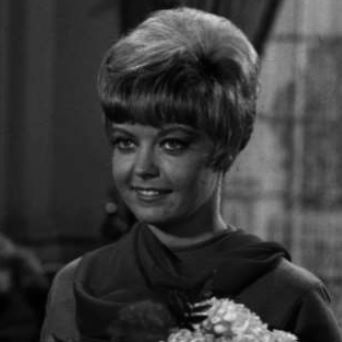

In [ ]:
img = cv.imread('/content/drive/MyDrive/female.JPG')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

Sharpen

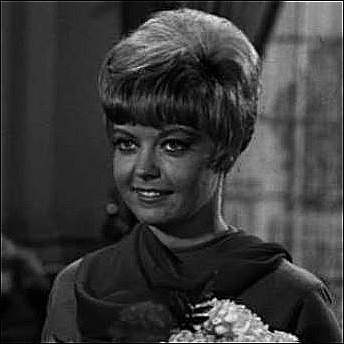

In [ ]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution2d(img_gray,kernel_sharpen,1,2))

Emboss

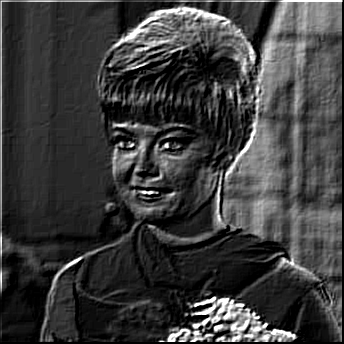

In [ ]:
kernel_emboss = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution2d(img_gray,kernel_emboss,1,2))

Left
Sobel
Edge
Detection

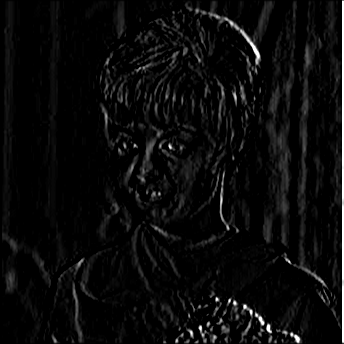

In [ ]:
kernel_sobel = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])

cv2_imshow(convolution2d(img_gray,kernel_sobel,1,2))

Canny
Edge
Detection

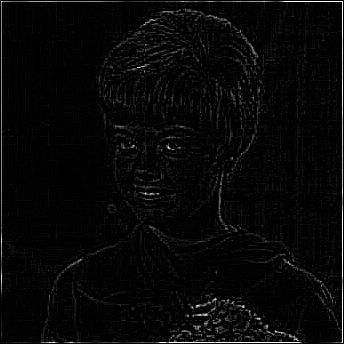

In [ ]:
kernel_canny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))

prewitt Edge Detection

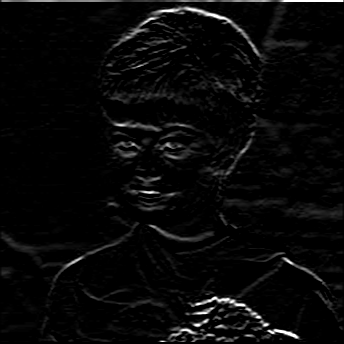

In [ ]:
kernel_canny = np.array([[-1,-1,-1],
                         [0,0,0],
                         [1,1,1]])

cv2_imshow(convolution2d(img_gray,kernel_canny,1,2))

5x5 Gaussian Blur

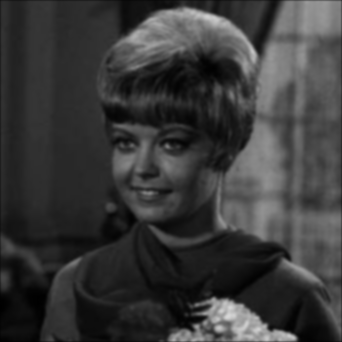

In [ ]:
kernel_size = 5

sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

border_kernel = (1/256) * np.array([[1, 4, 6, 4, 1],
                                    [4, 16, 24, 16, 4],
                                    [6, 24, 36, 24, 6],
                                    [4, 16, 24, 16, 4],
                                    [1, 4, 6, 4, 1]])


cv2_imshow(convolution2d(img_gray,border_kernel,1,2))

21x21
Gaussian
Blur

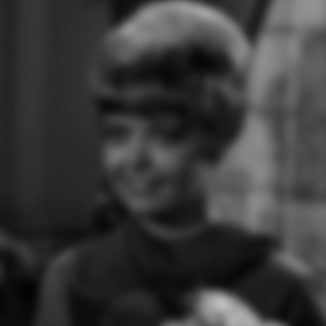

In [ ]:
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray,gauss_kernel,1,2))